# Q2-6.自動ライト

## 問題
**Q2-6.環境明るさの取得値をコマンドラインに表示し、3000以上の場合のみ、テストヘッドのdout0のLEDをONにする自動ライトを作りましょう。**

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
# sleep関数を使うためにtimeのライブラリをインポートする。
import time

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack

### ここから問題  ###
# Ctrl + Cで終了するまでループし続ける
while(True):
    m5_data = """(M5から値を取得する関数)"""
    # 取得した明るさをコマンドラインに表示。
    """(明るさ値をコマンドラインに表示する処理)"""
    # 3000以上ならdout0をONにする。
    """(明るさ3000以上ならdout0をON、3000未満ならOFFにする処理)"""
    # 0.5秒停止処理を入れる。
    time.sleep(0.5)
### ここまで  ###

### 動作イメージ

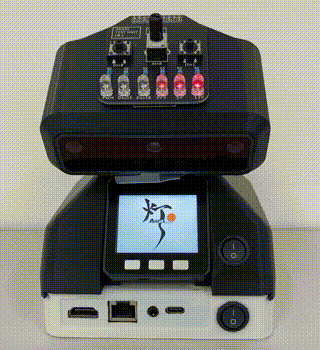

In [1]:
from IPython.display import Image
Image('image/q2-6.gif')

### ヒント

**Q2-3、Q2-5を参考にしましょう。**

[Q2-5](q2-5_temperature.ipynb)と同じように _get()_ を使ってM5のセンサ情報を取得します。  
返り値のm5_dataの中で、今回参照するのは["brightness"]のキーです。

明るさ値は0-4095で、 暗くなるほど値が大きくなります。  
今回は取得した明るさ値が3000以上かどうかをif文で判定して3000以上ならdout0をON、3000未満ならOFFにします。  

dout0のON、OFFの方法は[Q2-3](q2-3_dout.ipynb)と同じです。

完成したら実行してみましょう。  
0.5秒ごとにコマンドライン上に明るさ値が表示されるはずです。  
AKARIのボディー部の、AKARIから見て右側面に光センサがついています。  
これを手で覆ってみるなどして、コマンドラインに表示されている明るさ値が3000以上になった時にdout0のLEDが点灯、3000未満で消灯すれば成功です。

## 回答と解説
以下は回答例と解説です。動作が正しければ、これと同じでなくても問題ありません。

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
# sleep関数を使うためにtimeのライブラリをインポートする
import time

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack

### ここから問題  ###
# Ctrl + Cで終了するまでループし続ける
while(True):
    m5_data = m5.get()
    # 取得した明るさをコマンドラインに表示。
    print("明るさ値は" + str(m5_data["brightness"]) + "です。")
    # 3000以上ならdout0をONにする。
    if(m5_data["brightness"] >= 3000):
        m5.set_dout(pin_id=0, value=True)
    else:
        m5.set_dout(pin_id=0, value=False)
    # 0.5秒停止処理を入れる。
    time.sleep(0.5)
### ここまで  ###

#### 16行目:
```python
m5_data = m5.get()
```
[Q2-5](q2-5_temperature.ipynb)と同じように _m5_ という名前でAkariClient().m5stackのインスタンスを作成しているので、m5.get()という形で呼び出します。

#### 18行目:
```python
print("明るさ値は" + str(m5_data["brightness"]) + "です。")
```
今回は、"m5_data["brightnesss"]" を参照します。[Q2-5](q2-5_temperature.ipynb)と同様、この値を文字列に変換した上で、前後に文字列を合成して、"明るさ値は〇〇です。"という表示にします。

#### 20-23行目:
```python
if(m5_data["brightness"] >= 3000):
    m5.set_dout(pin_id=0, value=True)
else:
    m5.set_dout(pin_id=0, value=False)
```
m5_data["brightness"]が3000以上かどうかを、if文を使って判定します。 3000以上の場合はdout0をONにします。  
[Q2-3](q2-3_dout.ipynb)と同様m5.set_dout()を使います。 _pin_id=0_ , _value=True_ です。

3000以下の場合の処理はelse以下に書きます。  
dout0をOFFにするには同じくm5.set_dout()を使い、 _pin_id=0_ , _value=False_ です。

## 最後に
これでQ2-6は終了です。次は、手動ライトをつくってみましょう。

[次の問題へ](q2-7_manual_light.ipynb)